### LDA implementation

In [ ]:
PATH = r''
file_name = 'covid19_tweets_off.csv'
import os
os.chdir(PATH)

In [20]:
%run setup.ipynb

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
lemmatized_corpus = pd.read_csv(f'{PATH}/{file_name}')

In [22]:
vectorizer = CountVectorizer(analyzer = "word",
                             stop_words = 'english',
                             max_features = 5000)

vectorized_corspus = vectorizer.fit_transform(lemmatized_corpus.text) #transforms the corpus in a document-terms matrix, 
                                                                      #each entry is the absolute freq of a specific word in a given doc

In [23]:
lda_model = LatentDirichletAllocation(n_components=15,
                                      learning_method = 'online',
                                      n_jobs = -1)
lda_out = lda_model.fit_transform(vectorized_corspus)
lda_out #document-topics matrix

array([[0.00833333, 0.00833333, 0.00833333, ..., 0.00833333, 0.00833333,
        0.00833333],
       [0.00952381, 0.00952381, 0.00952381, ..., 0.58095237, 0.00952381,
        0.00952381],
       [0.00952381, 0.00952381, 0.00952381, ..., 0.00952381, 0.00952381,
        0.00952381],
       ...,
       [0.61333334, 0.01333333, 0.01333333, ..., 0.01333333, 0.01333333,
        0.01333333],
       [0.00952381, 0.00952381, 0.00952383, ..., 0.15238095, 0.00952381,
        0.15238094],
       [0.10666666, 0.00666667, 0.10666667, ..., 0.00666667, 0.00666667,
        0.20666667]])

In [24]:
#Retriving n-most frequent words for each topic

def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_: #iterates over topic-words probability distributions
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


Coherence Computation by Gensim

In [25]:
corpus_for_gensim  = lemmatized_corpus['text'].apply(lambda x: x.split())
dictionary = Dictionary(corpus_for_gensim)
corpus = [dictionary.doc2bow(doc) for doc in corpus_for_gensim]
topics = show_topics(vectorizer, lda_model, 15)

cm = CoherenceModel(topics = topics, corpus = corpus, dictionary=dictionary, coherence='u_mass')

cm.get_coherence()

-5.486345034775981

In [26]:
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_model, vectorized_corspus, vectorizer, mds = 'tsne')

Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 30: character maps to <undefined>
C:\Users\podre\AppData\Local\Packages\PythonSoftwareFou

PreparedData(topic_coordinates=               x           y  topics  cluster      Freq
topic                                                  
10    -32.483341  -82.571648       1        1  9.336331
2     -24.043037   21.126585       2        1  7.204546
3      10.434910   18.580082       3        1  7.098709
1     -51.881844   -7.055553       4        1  7.066681
0      -2.586719  -54.764149       5        1  6.641138
6      20.047031  -89.390060       6        1  6.587749
11     80.427765  -61.935062       7        1  6.516289
7      -0.703719  104.947716       8        1  6.467200
14    -14.049135   58.973076       9        1  6.454137
12    -60.668816   30.153522      10        1  6.371493
4      14.325454  -22.390478      11        1  6.367290
5      27.050549   47.964325      12        1  6.106857
13     63.542969   47.436516      13        1  6.078270
9      47.712826   -4.833255      14        1  5.891936
8     -26.708817  -29.532003      15        1  5.811374, topic_info=          Term          Freq         Total Category  logprob  loglift
648       case  13228.000000  13228.000000  Default  30.0000  30.0000
2989       new  11017.000000  11017.000000  Default  29.0000  29.0000
3242    people   8832.000000   8832.000000  Default  28.0000  28.0000
4470      test   6377.000000   6377.000000  Default  27.0000  27.0000
1136     death   6659.000000   6659.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1736    figure    384.679362    385.608179  Topic15  -4.9535   2.8429
4185   special    383.091382    384.020199  Topic15  -4.9576   2.8429
1641    expose    359.877474    360.806291  Topic15  -5.0202   2.8428
2145      host    354.251971    355.180788  Topic15  -5.0359   2.8427
3171  pandemic   4553.569519   6238.037787  Topic15  -2.4823   2.5306

[521 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5        14  0.997923       able
25        8  0.998904     access
30        4  0.998920     accord
44       12  0.998409        act
46       14  0.999138     action
...     ...       ...        ...
4977      5  0.673503       year
4977      9  0.326305       year
4983      5  0.999013        yes
4984      8  0.998984  yesterday
4989      4  0.999427      young

[506 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 3, 4, 2, 1, 7, 12, 8, 15, 13, 5, 6, 14, 10, 9])

In [27]:
topic_keywords = show_topics(vectorizer, lda_model, 15)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

In [28]:
topic_names = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9',
               '10', '11', '12', '13', '14']
df_topic_keywords['topic_names'] = topic_names
df_topic_keywords.set_index('topic_names', inplace = True)

df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
topic_names,,,,,,,,,,,,,,,
0,time,use,government,support,great,start,year,amp,let,increase,long,team,challenge,active,staff
1,people,know,make,think,stop,thing,risk,watch,worker,check,feel,man,person,work,young
2,amp,work,way,million,thank,business,family,post,include,free,lead,issue,hear,announce,friend
3,need,help,state,vaccine,fight,response,study,community,important,love,health,leave,hard,lot,america
4,school,spread,come,live,august,continue,record,learn,datum,kid,medical,research,send,measure,symptom
5,die,trump,home,impact,crisis,amp,infection,try,bring,make,control,sure,link,economic,begin
6,mask,wear,face,read,safe,rate,stay,social,really,lose,job,big,hand,medium,distancing
7,today,world,number,total,care,confirm,hour,plan,video,happen,health,discuss,economy,away,govt
8,pandemic,look,ask,place,pay,amid,question,treatment,speak,fact,area,despite,meet,push,tweet


In [29]:
docnames = ["Doc" + str(i) for i in range(lda_out.shape[0])]


df_document_topic = pd.DataFrame(np.round(lda_out, 2), columns=topic_names, index=docnames)


dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,dominant_topic
Doc0,0.01,0.01,0.01,0.01,0.88,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,4
Doc1,0.01,0.01,0.01,0.01,0.01,0.15,0.01,0.15,0.01,0.01,0.01,0.01,0.58,0.01,0.01,12
Doc2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,0.01,0.01,0.01,0.01,7
Doc3,0.01,0.01,0.01,0.01,0.01,0.18,0.01,0.01,0.01,0.01,0.18,0.01,0.51,0.01,0.01,12
Doc4,0.36,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.36,0.02,0.02,0.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc144885,0.21,0.01,0.01,0.01,0.01,0.01,0.01,0.21,0.01,0.21,0.01,0.21,0.01,0.01,0.01,0
Doc144886,0.01,0.08,0.31,0.08,0.01,0.01,0.08,0.24,0.01,0.01,0.01,0.01,0.08,0.01,0.08,2
Doc144887,0.61,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.21,0.01,0.01,0.01,0.01,0.01,0.01,0
Doc144888,0.01,0.01,0.01,0.15,0.01,0.01,0.15,0.01,0.15,0.01,0.15,0.01,0.15,0.01,0.15,3


### Coherence for 5, 20 , 40 topics

In [11]:
coherences = []

for t in (5, 20, 40):
    lda_model = LatentDirichletAllocation(n_components=t,
                                        learning_method = 'online',
                                        n_jobs = -1)
    lda_model.fit_transform(vectorized_corspus)
    topics = show_topics(vectorizer, lda_model, 15)
    cm = CoherenceModel(topics = topics, corpus = corpus, dictionary=dictionary, coherence='u_mass')
    coherences.append(cm.get_coherence())

topic_comparison = pd.DataFrame({'coherence': pd.Series(coherences, index = ['5 topics', '20 topics', '40 topics'])})
topic_comparison

,coherence
5 topics,-4.018688
20 topics,-5.965328
40 topics,-8.678213


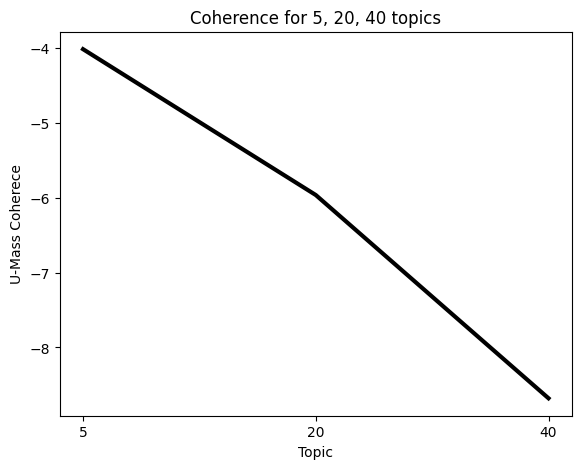

In [30]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,.8,.8]) # main axes
plt.plot(
    np.arange(len(coherences)),
    coherences,
    linewidth=3,
    color='black'
)
ax.set_xticks(np.arange(len(coherences)))
ax.set_xticklabels([5,20,40])
plt.title('Coherence for 5, 20, 40 topics')
plt.xlabel('Topic')
plt.ylabel('U-Mass Coherece')

plt.show()